In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import requests
from bs4 import BeautifulSoup
import os
import tweepy
import time
import glob
import ast
from datetime import date
%matplotlib inline

# GATHERING DATA

### Reading the twitter_archive_enhance.csv file into dataframe

In [2]:
#read the twitter archive enhanced csv file
twitter_enhanced = pd.read_csv('sample_data/twitter-archive-enhanced.csv')

### Downloading the image_predictions.tsv using the requests library

##### **create** folder

In [3]:
# create the folder name
folder_name = 'data_wrangling_project'

#set a condition that executes if folder name doesn't exist
if not os.path.exists(folder_name):
  os.makedirs(folder_name)

##### **retrieve** data

In [4]:
# specify the url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# retreive data from the url
response = requests.get(url)

##### **open** file, **write** to file and **read** the extracted file

In [5]:
#get content of the tsv file
with open(os.path.join(folder_name, url.split('/')[-1]), 'wb') as image_predictions:

  #write the content to image_predictions
  image_predictions.write(response.content)

  #read the file
  image_predictions.read
  
  #print the result
  print(image_predictions)

<_io.BufferedWriter name='data_wrangling_project/image-predictions.tsv'>


##### **verify** that the file is in the folder

In [6]:
# verify the directory to ensure the file was extracted successfully
os.listdir(folder_name)

['image-predictions.tsv']

##### **read** the **image-predictions.tsv** file into a pandas dataframe

In [7]:
# read the tsv file into dataframe: image_predictions
image_predictions = pd.read_csv('data_wrangling_project/image-predictions.tsv', sep='\t')


### 

### Query the twitter API for the **tweet ID**, **retweet count** and **favorite count**

##### input your consumer keys and access keys and authenticate them

In [ ]:
# input your consumers keys and access tokens
consumer_key = 'consumer key'
consumer_secret = 'consumer secret key'
access_token = 'access token'
access_secret = 'access token secret'

# authenticate your keys
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#Create an API class
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


##### access twitter data through api and store in a list

In [ ]:
#accessing twitter data through api
#create a list  to store the tweet data
tweet_list = []

#error list to store missing tweet id
tweet_list_error = []

#initialize start time
start_time = time.time()

# save ech tweet data queried in a txt file as a new line
with open('tweet_json.txt', mode='w') as tweet_json :
  # use for loop to iterate through the list of ids
  for id in twitter_enhanced['tweet_id'].values:

  # use the try-except error handler to cater for missing tweet ids
    try:
      tweet_1 = api.get_status(id, tweet_mode='extended')._json
      #tweet_2 = api.get_status(id, tweet_mode='extended')._json
      #print('success')
      json.dump(tweet_1, tweet_json)

      #write the file line by line
      tweet_json.write('\n')

      #get the necessary info from the tweet json file
      favorites = tweet_1['favorite_count'] # How many favorites the tweet had
      retweets = tweet_1['retweet_count'] # Count of the retweet
      user_favourites = tweet_1['user']['favourites_count'] # How many favorites the user had
      date_time = tweet_1['created_at'] # The date and time of the creation

      #append the info to a list  
      tweet_list.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    
    except tweepy.TweepError as e:
      tweet_list_error.append(id)

#initialize end time
end_time = time.time()
#display the execution time
display('time for execution is : {}'.format(end_time-start_time))



KeyboardInterrupt: ignored

##### read the file data into a dataframe


In [ ]:
tweet_1['full_text']

'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'

In [ ]:
#for text in tweet_1['full_text']:
 # text = tweet_1['full_text'][-38:-37]
  #text_2 = tweet_1['full_text'][-36:-34]
  #tweet_list.append({
   #   'rating_numerator':int(text),
    #  'rating_denominator':int(text_2)
 # })

In [ ]:
# convert the tweet_list to dataframe
json_tweets = pd.DataFrame(tweet_list, columns = ['tweet_id', 'date_time', 'favorites', 'retweets',
                                                'user_favourites'])
# save the dataframe as csv file
json_tweets.to_csv('sample_data/json_tweets.csv', index = False)


In [8]:
# read the csv file
json_tweets_df = pd.read_csv('sample_data/json_tweets.csv')

# ACCESSING

### Accessing visually
 
> we will be looking at the twitter_enhanced_df dataset first

In [9]:
#make a copy of each file
twitter_enhanced_df = twitter_enhanced.copy()
image_predictions_df = image_predictions.copy() 
json_tweet_df = json_tweets_df.copy()

In [10]:
#print the head of twitter_enhanced_df
twitter_enhanced_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


+ Column **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id	retweeted_status_user_id and retweeted_status_timestamp** contains null values
+ Column headers **doggo, fluffer, pupper and puppo** are values not headers


In [11]:
# sample the data
twitter_enhanced_df.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
785,775085132600442880,NaN,NaN,2016-09-11 21:34:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He would like a hug. 13/10 som...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775085132...,13,10,Tucker,None,None,None,None
1104,735137028879360001,NaN,NaN,2016-05-24 15:55:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Buckley. His family &amp; some neighbors ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735137028...,9,10,Buckley,None,None,pupper,None
1350,704113298707505153,NaN,NaN,2016-02-29 01:17:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stanley. He's an inverted Uzbekistani wat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704113298...,8,10,Stanley,None,None,None,None
395,825535076884762624,NaN,NaN,2017-01-29 02:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very loving and accepting puppo. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825535076...,14,10,None,None,None,None,puppo
643,793195938047070209,NaN,NaN,2016-10-31 21:00:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's pupset that her costu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793195938...,12,10,Lily,None,None,None,puppo
1308,707297311098011648,NaN,NaN,2016-03-08 20:09:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She can go from sweet to scary...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707297311...,10,10,Cassie,None,None,None,None
263,842535590457499648,NaN,NaN,2017-03-17 00:38:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She lost her body saving a chi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842535590...,13,10,Winnie,None,None,None,None
2239,667937095915278337,NaN,NaN,2015-11-21 05:26:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog resembles a baked potato. Bed looks u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667937095...,3,10,None,None,None,None,None
1152,725786712245440512,NaN,NaN,2016-04-28 20:40:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lillie. She's a Rutabagan Floofem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725786712...,11,10,Lillie,None,None,pupper,None
271,841077006473256960,NaN,NaN,2017-03-13 00:02:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dawn. She's just checking pup on you. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841077006...,12,10,Dawn,None,None,None,None


+ invalid dog names like *a* and value *None* present

### Accessing programmatically

> accessing twitter_enhanced_df data set programmatically

In [12]:
# Get the dataset information 
twitter_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

+ erroneous data types: tweet_id should of type string, timestamp should be datetime type
+ presence of duplicate rows since we have retweet information(retweeted_status_id, retweeted_status_timestamp, retweeted_status_user_id ). We are only interested in the original tweets

In [13]:
# get the summary statistics
twitter_enhanced_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


+ rating denominator min value of 0 is incorresct. it should be 10
+ outliers in the rating_numerator e.g minimum value of 10 and maximum of 1776. there are other apart from these.

In [14]:
# check for rows where rating numerator > 17
twitter_enhanced_df[twitter_enhanced_df['rating_numerator'] > 17]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [15]:
#check for duplicate rows or values
sum(twitter_enhanced_df.duplicated())

0

In [16]:

#check the shape
twitter_enhanced_df.shape

(2356, 17)

### Accessing the image_predictions_df dataset

> Accessing visually

In [17]:
# print head of the image_predictions_df
image_predictions_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


+ p1, p2, p3 in the image prdiction dataset having underscore

### Accesssing programmatically

In [18]:
# check the dataset info
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
#check for indepth description
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
#check for duplicates
image_predictions_df.duplicated().sum()

0

In [21]:
image_predictions_df[image_predictions_df.p1 =='redbone' ]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
155,668815180734689280,https://pbs.twimg.com/media/CUgb21RXIAAlff7.jpg,1,redbone,0.461172,True,Italian_greyhound,0.270733,True,miniature_pinscher,0.109752,True
278,670995969505435648,https://pbs.twimg.com/media/CU_bRIEWcAAUVC7.jpg,1,redbone,0.866221,True,beagle,0.061194,True,Rhodesian_ridgeback,0.024285,True
1191,739932936087216128,https://pbs.twimg.com/media/CkTFEe-W0AA90m1.jpg,1,redbone,0.243904,True,beagle,0.210975,True,vizsla,0.076443,True
1276,750071704093859840,https://pbs.twimg.com/media/CmjKOzVWcAAQN6w.jpg,2,redbone,0.382113,True,malinois,0.249943,True,miniature_pinscher,0.070926,True
1386,766069199026450432,https://pbs.twimg.com/media/CqGf3xaXYAEh3ak.jpg,1,redbone,0.484855,True,beagle,0.437527,True,basset,0.010585,True


In [22]:
# check for prediction greater than 0.5
image_predictions_df[image_predictions_df.p1_conf >= 0.5]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [23]:
# check for prediction greater than 0.5 for p2_conf
image_predictions_df[image_predictions_df.p2_conf >= 0.5]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [24]:
# check for prediction greater than 0.5 for p3_conf
image_predictions_df[image_predictions_df.p3_conf >= 0.5]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Accessing the json_tweet_df dataset

In [25]:
json_tweet_df.head()

,Unnamed: 0,tweet_id,favorites,retweets,user_favourites,date_time
0,0,892420643555336193,33727,6979,147178,2017-08-01 16:23:56+00:00
1,1,892177421306343426,29254,5280,147178,2017-08-01 00:17:27+00:00
2,2,891815181378084864,21987,3466,147178,2017-07-31 00:18:03+00:00
3,3,891689557279858688,36823,7198,147178,2017-07-30 15:58:51+00:00
4,4,891327558926688256,35207,7723,147178,2017-07-29 16:00:24+00:00


In [26]:
# check the dataset info
json_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2327 non-null   int64 
 1   tweet_id         2327 non-null   int64 
 2   favorites        2327 non-null   int64 
 3   retweets         2327 non-null   int64 
 4   user_favourites  2327 non-null   int64 
 5   date_time        2327 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.2+ KB


In [27]:
json_tweet_df.duplicated().sum()

0

## **Quality issues**
+ incomplete records in the json_tweet
+ Column in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id retweeted_status_user_id and retweeted_status_timestamp contains null values
+ erroneous data types
+ rating denominator value of *None* and less than 10 
+ incorrect dog like *a* and **None**
+ presence of duplicate rows
+ outliers in the rating_numerator e.g minimum value of 0 and maximum of 1776. There are other apart from these.
+ p1, p2, p3 in the image prdiction dataset having underscore
+ only true prediction with their confidence level are needed
+ presence of irrelevant columns


## **Tidiness issues**
+ Column headers doggo, fluffer, pupper and puppo are values not headers
+ only one table should exist

<h1> CLEANING </h1>

### Define 
> missing records in the json_tweet dataset due to tweets corresponding to the missing tweet_ids. We will merge the twitter_enhanced_df with the json_tweet dataset on the tweet_id column using right join so any tweet_id in the json_tweet that's not in the twitter_enhanced_df will not get added

### Code

In [28]:
# merge the twitter_enhanced_df json_tweet
twitter_archive = twitter_enhanced_df.merge(json_tweet_df, on ='tweet_id', how = 'right')

### Test

In [29]:
#print the first few rows
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,Unnamed: 0,favorites,retweets,user_favourites,date_time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,Phineas,None,None,None,None,0,33727,6979,147178,2017-08-01 16:23:56+00:00
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Tilly,None,None,None,None,1,29254,5280,147178,2017-08-01 00:17:27+00:00
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Archie,None,None,None,None,2,21987,3466,147178,2017-07-31 00:18:03+00:00
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Darla,None,None,None,None,3,36823,7198,147178,2017-07-30 15:58:51+00:00
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,Franklin,None,None,None,None,4,35207,7723,147178,2017-07-29 16:00:24+00:00


In [30]:
#print the shape
twitter_archive.shape

(2327, 22)

In [31]:
# make a copy of the twitter_archive
twitter_archive_df = twitter_archive.copy()

## Define 
> Presence of duplicate rows: rows with retweet information like retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are duplicates as they are retweets. We are only interested in the original tweet information. we filter the dataframe for rows with null values. This gives a new dataframe with no retweet information

## Code

In [32]:
# print shape of dataframe 

In [33]:
# isolate the rows where retweet information is not null
tweet = twitter_archive_df[~twitter_archive_df[['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].isnull().all(axis=1)]

# get the index of the new dataframe and store as list
tweet_1 = list( tweet.index)
tweet_1

# iterate through the list and drop any row number in the list present in the twitter_archive_df
for i in tweet_1:
  twitter_archive_df = twitter_archive_df.drop([i]) 

## Test

In [34]:
# verify the result
twitter_archive_df[~twitter_archive_df[['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']].isnull().all(axis=1)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,Unnamed: 0,favorites,retweets,user_favourites,date_time


### Define
> Null values:  **Column in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id retweeted_status_user_id and retweeted_status_timestamp**  contains too much Null values and since its not relevant to our analysis as we are intereted only in the original tweets, columns will be dropped

### Code

In [35]:
# Drop irrelevant columns
twitter_archive_df = twitter_archive_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'Unnamed: 0', 'retweeted_status_user_id', 'date_time','retweeted_status_timestamp'],  axis=1)

### Test

In [36]:
twitter_archive_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_favourites
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,33727,6979,147178
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,29254,5280,147178
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,21987,3466,147178
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,36823,7198,147178
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,35207,7723,147178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,88,36,147178
2323,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,246,115,147178
2324,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,100,36,147178
2325,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,112,39,147178


### Define
> rating denominator of value *None* and values being less than the 10 and . All rating denominator should be 10 so we will replace values less than 10 with 10

### Code

In [37]:
#mask = twitter_archive_df['rating_denominator'] != 10
# replace all values less than 10 with 10
twitter_archive_df['rating_denominator'] = twitter_archive_df['rating_denominator'].mask(twitter_archive_df['rating_denominator'] < 10, 10, inplace=True)

In [38]:
# Replace values None with 10
rating_denominator = {None: 10}
twitter_archive_df['rating_denominator'] =[rating_denominator[item] for item in twitter_archive_df.rating_denominator]

### Test

In [39]:
#verify for values less than 10
twitter_archive_df[twitter_archive_df['rating_denominator']<10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_favourites


In [40]:
# verify the result
twitter_archive_df[twitter_archive_df['rating_denominator'] == 'None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_favourites


In [41]:
twitter_archive_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_favourites
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,33727,6979,147178
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,29254,5280,147178
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,21987,3466,147178
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,36823,7198,147178
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,35207,7723,147178


### Define
> values in the p1, p2, p3 column of image_predictions dataset have underscore (_) which doesn't conform to the required schema as they are not column headers since the columns contains names 

### Code

In [42]:
# write a fuction that replace underscore(_) with space (' ')
def replace_char (df, column):

  df[column].astype('str')
  df[column] = df[column].str.replace('_', ' ')
  return df[column]

In [43]:
#image_predictions_df['p1'].astype('str')
#image_predictions_df['p1'].dtypes
replace_char (image_predictions_df, 'p1')
replace_char (image_predictions_df, 'p2')
replace_char (image_predictions_df, 'p3')


0                 Shetland sheepdog
1               Rhodesian ridgeback
2                        bloodhound
3                miniature pinscher
4                          Doberman
                   ...             
2070    German short-haired pointer
2071                        spatula
2072                         kelpie
2073                       papillon
2074                         banana
Name: p3, Length: 2075, dtype: object

### Test

In [44]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define
> outliers in the rating_numerator e.g minimum value of 0 and maximum of 1776. There are other apart from these : rows with **rating numerator** of 0. There are only two rows with rating numerator of 0 and there is no information in the tweet about rating numerator so we drop them. other values like 1776 are valid so therefore should be left as it is  

### Code

In [45]:
# inspect the row(s) with rating numerator of 0
twitter_archive_df[twitter_archive_df['rating_numerator']==0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_favourites
299,835152434251116546,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None,20923,2755,147178
988,746906459439529985,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None,2712,269,147178


In [46]:
# drop the rows
twitter_archive_df = twitter_archive_df.drop([299, 988])


### Test

In [47]:
# verify if the rows have been deleted
twitter_archive_df[twitter_archive_df['rating_numerator']==0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_favourites


### Define
> incorrect dog like a and None : dog name being **None**: the data is valid as no dog names were  mentioned in the in the tweets involved, so we leave it that way but others like **a**, we check the tweet to extract the valid names and if none are present, we replace them with **None**

### Code

In [48]:
# create a mask to extract the invalid names
mask_name = twitter_archive_df.name.str.contains('^[a-z]', regex = True)

# print out the names
twitter_archive_df[mask_name].name.value_counts().sort_index()


a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [49]:
# check rows with these values and inspect the tweet text
twitter_archive_df[mask_name].sample(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_favourites
2037,671147085991960577,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,https://twitter.com/dog_rates/status/671147085...,9,10,a,None,None,None,None,583,191,147178
1894,674082852460433408,2015-12-08 04:27:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sagitariot Baklava mix. Loves her ne...,https://twitter.com/dog_rates/status/674082852...,11,10,a,None,None,None,None,682,144,147178
2117,669923323644657664,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None,202,50,147178
997,746369468511756288,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None,5753,1482,147178
2235,667538891197542400,2015-11-20 03:04:08 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,https://twitter.com/dog_rates/status/667538891...,9,10,a,None,None,None,None,175,58,147178
2282,666781792255496192,2015-11-18 00:55:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,https://twitter.com/dog_rates/status/666781792...,10,10,a,None,None,None,None,325,168,147178
629,792913359805018113,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None,13553,3703,147178
2169,668815180734689280,2015-11-23 15:35:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a wild Toblerone from Papua New Guinea...,https://twitter.com/dog_rates/status/668815180...,7,10,a,None,None,None,None,492,225,147178
2189,668507509523615744,2015-11-22 19:13:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Birmingham Quagmire named Chuk. Love...,https://twitter.com/dog_rates/status/668507509...,10,10,a,None,None,None,None,277,87,147178
2226,667773195014021121,2015-11-20 18:35:10 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a rare Hungarian Pinot named Jessiga. ...,https://twitter.com/dog_rates/status/667773195...,8,10,a,None,None,None,None,204,44,147178


> Upon careful analysis of the tweets, there seem to be no mention of dog names in the rows above. We replace all invalid names with **None**

In [50]:
# replace all invalid names with None
twitter_archive_df['name'] = twitter_archive_df['name'].str.replace('^[a-z]+', 'None', regex = True)

## Test

In [51]:
# verify the result
twitter_archive_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_favourites
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,33727,6979,147178
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,29254,5280,147178
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,21987,3466,147178
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,36823,7198,147178
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,35207,7723,147178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,88,36,147178
2323,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,None,None,None,246,115,147178
2324,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,None,None,None,100,36,147178
2325,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,None,None,None,112,39,147178


### Define
> only one table should exist. Merge twitter_archive_df with image_predictions_df

### Code

In [52]:
# merge the twitter_archive_df with image_predictions_df
twitter_archive_df = twitter_archive_df.merge(image_predictions_df, on = 'tweet_id', how= 'inner')

### Test

In [53]:
twitter_archive_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,1,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,2,basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True


In [54]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1984 non-null   int64  
 1   timestamp           1984 non-null   object 
 2   source              1984 non-null   object 
 3   text                1984 non-null   object 
 4   expanded_urls       1984 non-null   object 
 5   rating_numerator    1984 non-null   int64  
 6   rating_denominator  1984 non-null   int64  
 7   name                1984 non-null   object 
 8   doggo               1984 non-null   object 
 9   floofer             1984 non-null   object 
 10  pupper              1984 non-null   object 
 11  puppo               1984 non-null   object 
 12  favorites           1984 non-null   int64  
 13  retweets            1984 non-null   int64  
 14  user_favourites     1984 non-null   int64  
 15  jpg_url             1984 non-null   object 
 16  img_nu

### Define
> only true prediction with their confidence level are needed. Write a function that extract the true prediction and and their corresponding confidence level

### Code

In [55]:
# We will store the fisrt true algorithm with it's level of confidence
prediction = []
confidence = []

# prediction_confidence function:
# search the first true algorithm and append it to a list with it's level of confidence
# if flase prediction_algorthm will have a value of Nan
def prediction_confidence(df):
    if df['p1_dog'] == True:
        prediction.append(df['p1'])
        confidence.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        prediction.append(df['p2'])
        confidence.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        prediction.append(df['p3'])
        confidence.append(df['p3_conf'])
    else:
        prediction.append('None')
        confidence.append(0)

twitter_archive_df.apply(prediction_confidence, axis=1)
twitter_archive_df['prediction'] = prediction
twitter_archive_df['confidence'] = confidence

In [56]:
# delete the original prediction and confidence level columns and other columns of image_prdictions
twitter_archive_df = twitter_archive_df.drop(['img_num', 'p1','p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

### Test

In [57]:
# verify the change
twitter_archive_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweets,user_favourites,jpg_url,prediction,confidence
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,33727,6979,147178,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,0.000000
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,29254,5280,147178,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,21987,3466,147178,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,36823,7198,147178,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,35207,7723,147178,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


### column headers 
>**doggo, floofer, pupper and puppo** should be values not column headers. A function is created that extract each dog stage count together with dog stage and append it to a list. A new row is then created in the twitter_archive_df containing this information

In [58]:
# create an empty list to store the dataframe 
dog_stage = []

#write a function that store the count of each type of dog 
def get_dog(df):
  # initiate a count
  count =0
  if df['doggo'] != 'None':
    count += 1
    dog_stage.append(df['doggo'])
  if df['floofer'] != 'None': 
    count += 1
    dog_stage.append(df['floofer'])
  if df['pupper'] != 'None':
    count += 1
    dog_stage.append(df['pupper'])
  if df['puppo'] != 'None':
    count += 1
    dog_stage.append(df['puppo'])
  if count > 1:
        dog_stage.pop()
        dog_stage.pop()
        dog_stage.append('multiple')
  if count == 0:
        dog_stage.append('None')

twitter_archive_df.apply(get_dog, axis=1)
twitter_archive_df['dog_stage'] = dog_stage






In [59]:
# drop the columns doggo, floofer, pupper, puppo
twitter_archive_df = twitter_archive_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

### Test

In [60]:
twitter_archive_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_favourites,jpg_url,prediction,confidence,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,33727,6979,147178,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,0.000000,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,29254,5280,147178,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,21987,3466,147178,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,36823,7198,147178,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador retriever,0.168086,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,35207,7723,147178,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,None


In [61]:
# check dataset for any othe issues
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1984 non-null   int64  
 1   timestamp           1984 non-null   object 
 2   source              1984 non-null   object 
 3   text                1984 non-null   object 
 4   expanded_urls       1984 non-null   object 
 5   rating_numerator    1984 non-null   int64  
 6   rating_denominator  1984 non-null   int64  
 7   name                1984 non-null   object 
 8   favorites           1984 non-null   int64  
 9   retweets            1984 non-null   int64  
 10  user_favourites     1984 non-null   int64  
 11  jpg_url             1984 non-null   object 
 12  prediction          1984 non-null   object 
 13  confidence          1984 non-null   float64
 14  dog_stage           1984 non-null   object 
dtypes: float64(1), int64(6), object(8)
memory usage: 248.0+

### Define
> Erroneous data types : change datatype of tweet_id to string, timestamp to datetime, rating_numerattor to float and dog_stage to category

### Code

In [62]:
# change data type 
twitter_archive_df['tweet_id'] = twitter_archive_df['tweet_id'].astype('str')
twitter_archive_df['dog_stage'] = twitter_archive_df['dog_stage'].astype('category')
twitter_archive_df['timestamp'] = pd.to_datetime(twitter_archive_df['timestamp'])

### Test

In [63]:
# verfy result
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1984 non-null   object             
 1   timestamp           1984 non-null   datetime64[ns, UTC]
 2   source              1984 non-null   object             
 3   text                1984 non-null   object             
 4   expanded_urls       1984 non-null   object             
 5   rating_numerator    1984 non-null   int64              
 6   rating_denominator  1984 non-null   int64              
 7   name                1984 non-null   object             
 8   favorites           1984 non-null   int64              
 9   retweets            1984 non-null   int64              
 10  user_favourites     1984 non-null   int64              
 11  jpg_url             1984 non-null   object             
 12  prediction          1984 non-null 

# Storing The Dataset

In [64]:
twitter_archive_df.to_csv('twitter_archive_master.csv', index=False)

# Analysis and Visualization

### Read the file twitter_archive_master 
> This data set to be used for analysis and visualization  have been gathered, accessed both visually and programmatically and also cleaned.



In [66]:
# read the twitter_archive_master file
twitter_archive_master = pd.read_csv('twitter_archive_master.csv', parse_dates = ['timestamp'])

# print the first few rows
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_favourites,jpg_url,prediction,confidence,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,33727,6979,147178,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,0.000000,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,29254,5280,147178,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,21987,3466,147178,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,36823,7198,147178,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador retriever,0.168086,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,35207,7723,147178,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,None


## What is the count of each dog stage?

In [67]:
# find the count of each dog breed
count_of_breed_type = twitter_archive_master['dog_stage'].value_counts()
print(count_of_breed_type)

None        1679
pupper       203
doggo         62
puppo         22
multiple      11
floofer        7
Name: dog_stage, dtype: int64


> About 80% of the dogs posted had no dogstage mentioned but for those whose dog stage was mentioned, pupper was seen to be predominant which is about 67% of the dogs with dog stage

## What is the mean rating

In [ ]:
# fing the mean rating
twitter_archive_master.rating_numerator.mean()

10.587426326129666

> The average rating of dogs with or without dog stage is approximately 11. This means we should expect the rating of any dog to be around this value

## What is the median rating

In [ ]:
# find the median rating
twitter_archive_master['rating_numerator'].median()

11.0

> The mid rating is almost the same as the average rating

## What value are dogs being rated most often?


In [79]:
# find the most frequent dog rating value
display(twitter_archive_master['rating_numerator'].mode())

0    12
dtype: int64

> This shows that more dogs are rated 12/10 

## count of each dog rating

In [ ]:
# get count for each dog rating
twitter_archive_master['rating_numerator'].sort_values(ascending = False).value_counts()

12    471
10    425
11    413
13    275
9     151
8      95
7      52
14     38
5      34
6      32
3      19
4      16
2       9
1       5
15      1
Name: rating_numerator, dtype: int64

> Although the most common rating is 12, this result shows that margin between rating 12 and the next top two rating (10 and 11) is not too wide but it gets wider as we go from 13 downwards.

##What is the highest  and lowest retweets a tweet has ever gotten?

In [81]:
# find the highext retweet count
print('The highest retweets is {}'.format(twitter_archive_master['retweets'].max()))

# fing the lowest retweets
print('The lowest retweets is {}'.format(twitter_archive_master['retweets'].min()))

The highest retweets is 70427
The lowest retweets is 11


## In what month and year did the highest  retweet occur?



In [ ]:
# extract month and year
month = twitter_archive_master['timestamp'].dt.month
year = twitter_archive_master['timestamp'].dt.year

# fing the highest retweet grouping by mnoth and year
twitter_archive_master.groupby([month, year])['retweets'].max()

timestamp  timestamp
1          2016         14845
           2017         39810
2          2016         13059
           2017         15383
3          2016         16597
           2017         13543
4          2016          7216
           2017         16094
5          2016         15470
           2017         30091
6          2016         70427
           2017         37304
7          2016         16264
           2017         15695
8          2016         26644
           2017          6979
9          2016         15470
10         2016         11677
11         2015         14570
           2016         21898
12         2015         28482
           2016         51485
Name: retweets, dtype: int64

> The highest retweet occurred in june 2016 with 70000+ retweets, followwed by december 2016 with 50000+ retweets and its lowest being about 7000 in august 2017

## What is the Highest and lowest favorites or likes a tweet has gotten?


In [ ]:
# find the highest number of likes
print('The highest number of likes is {}'.format(twitter_archive_master['favorites'].max()))
# find the lowest numberof likes
print('The lowest number of likes is {}'.format(twitter_archive_master['favorites'].min()))

The highest number of likes is 144398
The lowest number of likes is 0


## In what month and year did the highest number of likes occur?


In [ ]:
twitter_archive_master.groupby([month, year])['favorites'].max()

timestamp  timestamp
1          2016          33720
           2017         123766
2          2016          32986
           2017          62315
3          2016          30235
           2017          41117
4          2016          17320
           2017          41839
5          2016          49285
           2017         108583
6          2016         144398
           2017          92591
7          2016          41117
           2017          67085
8          2016          46141
           2017          33727
9          2016          28025
10         2016          28321
11         2015          42175
           2016          46655
12         2015          73278
           2016         111320
Name: favorites, dtype: int64

> WeRateDogs had it highest number of likes in june 2016 with about 144000+ likes which is the same day it had it highest retweets. It had it lowest likes in April 2016 which is about 17000+

In [ ]:
# find the 

**bold text**

## Visualizations

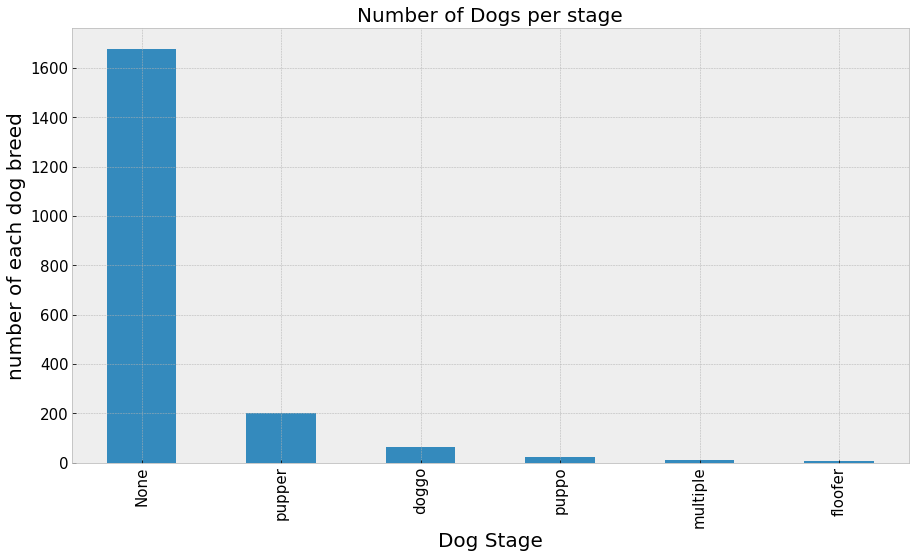

In [82]:
# visualize
# set style
plt.style.use('bmh')
# initialize subplot
fig, ax = plt.subplots()

#set plot size
fig.set_size_inches(15, 8)

# draw a bar plot
twitter_archive_master['dog_stage'].value_counts().plot(kind = 'bar')

# set axis labels and title
ax.set_title('Number of Dogs per stage', fontsize = 20)
ax.set_xlabel('Dog Stage', fontsize = 20)
ax.set_ylabel('number of each dog breed', fontsize =20 )
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

> Number of dogs with no dog stage have the highest population followed by dog stage pupper

## Distribution of rating numerator

Text(0.5, 1.0, 'Rating distribution')

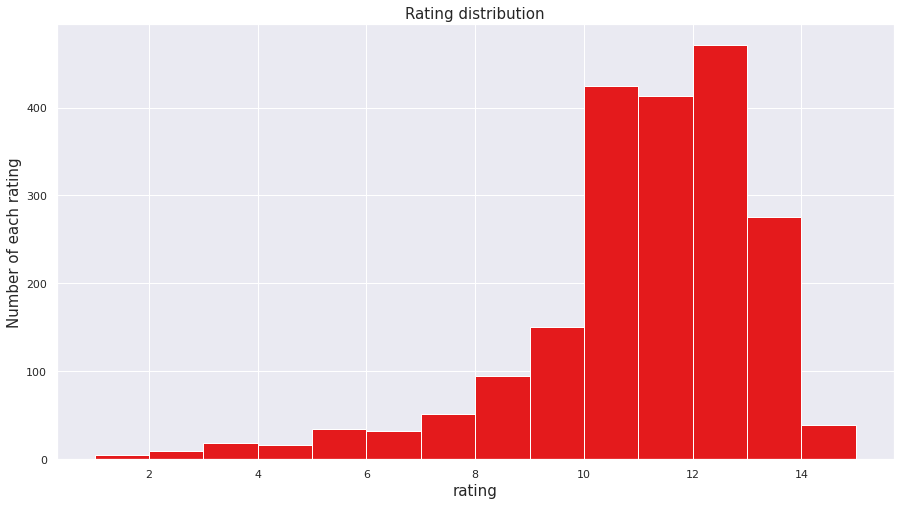

In [ ]:
# draw a histogram showing the distribution of the rating numerator
twitter_archive_master['rating_numerator'].unique()
twitter_archive_master['rating_numerator'].hist( bins =14)
plt.xlabel('rating', fontsize = 15)
plt.ylabel('Number of each rating', fontsize = 15)
plt.title('Rating distribution', fontsize = 15)

> the histogram show the distribution of the dog rating which appears to be left-skewed as more rating are to the right side consisting of high ratings

# How Does Number of likes Vary per month for Each Year

## Relational plot

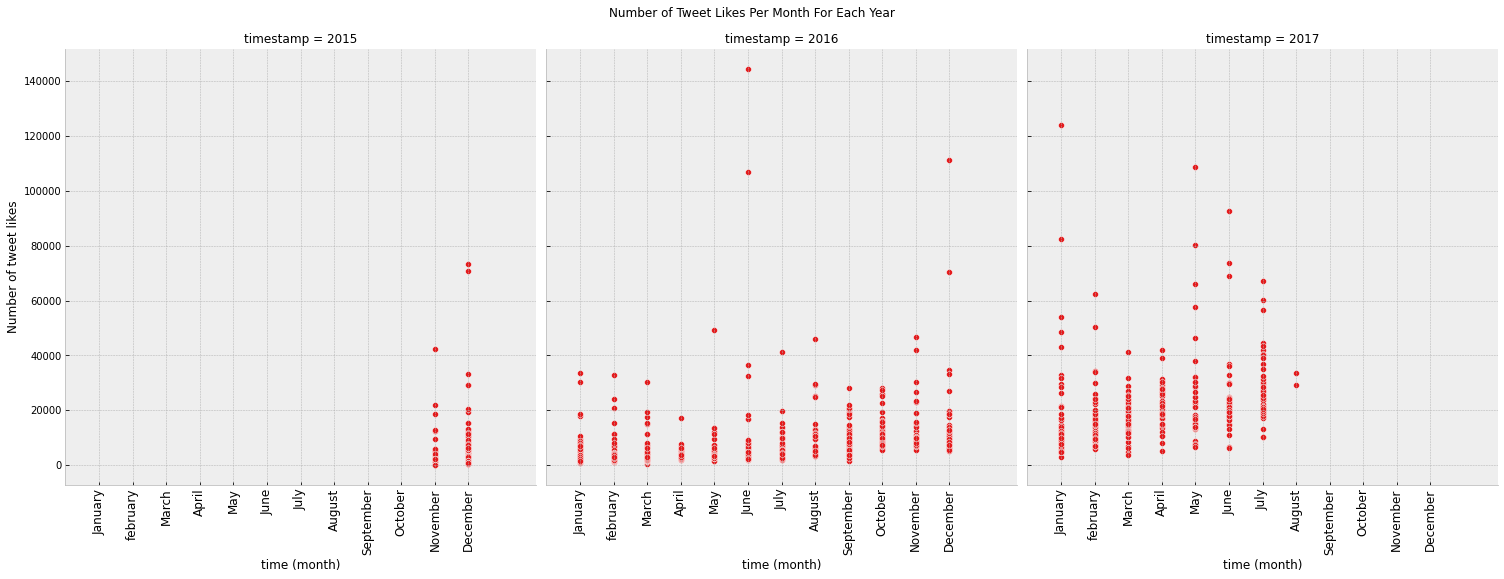

<Figure size 1440x2880 with 0 Axes>

In [83]:
# set the color
sns.set_palette('Set1')

# extract month from timestamp
monthly_retweets = twitter_archive_master['timestamp'].dt.month

# draw a relational plot
g = sns.relplot(x= monthly_retweets, y = twitter_archive_master['favorites'],  col = twitter_archive_master['timestamp'].dt.year, ci = None, markers = True, height = 7)

# set axis label and title
g.set(xlabel = 'time (month)', ylabel = 'Number of tweet likes')
g.set_xticklabels(size = 12)
g.fig.suptitle('Number of Tweet Likes Per Month For Each Year', y = 1.03)

#set tick labels
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['January', 'february', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
g.set_xticklabels(rotation = 90)


# set the plot size
plt.figure(figsize=(20,40))
plt.show()

> The number of likes are seen to increase over the years even though the highest likes occurred in june 2016. My guess is something must have happened in that month for the number of likes to shoot up exponentially

## Line plot

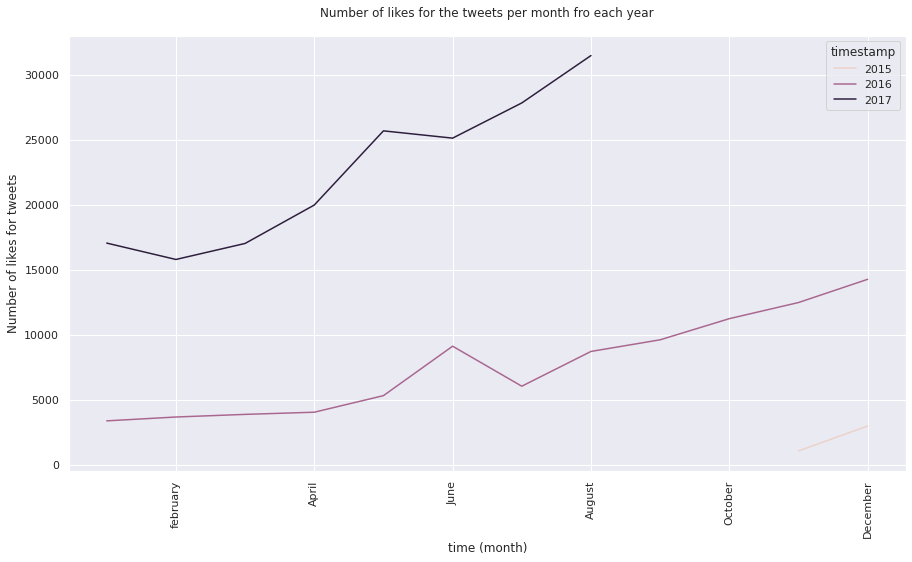

In [84]:
# set plot style
plt.style.use('ggplot')

# set color
sns.set_palette('Set1') 

# set the figure size
sns.set(rc = {'figure.figsize':(15,8)})

# draw a lineplot
p = sns.lineplot(x= monthly_retweets, y = twitter_archive_master['favorites'],  data = twitter_archive_master, hue = twitter_archive_master['timestamp'].dt.year, ci = None, markers = True, )

# set axis label
p.set(xlabel ='time (month)' , ylabel = 'Number of likes for tweets')

# set tick labels
made = [ 'January', 'february', 'April', 'June', 'August', 'October',
        'December']

p.set_xticklabels(made, rotation = 90)

#set title
p.set_title('Number of likes for the tweets per month fro each year', y = 1.03)
plt.show()


> This graph shows depict both daily and monthly trends for the likes. likes per month and per day get higher as we go from 2015 to 2017 which shows an increase in the twitter engagements 

# How does Retweet vary with time?

## Relational plot

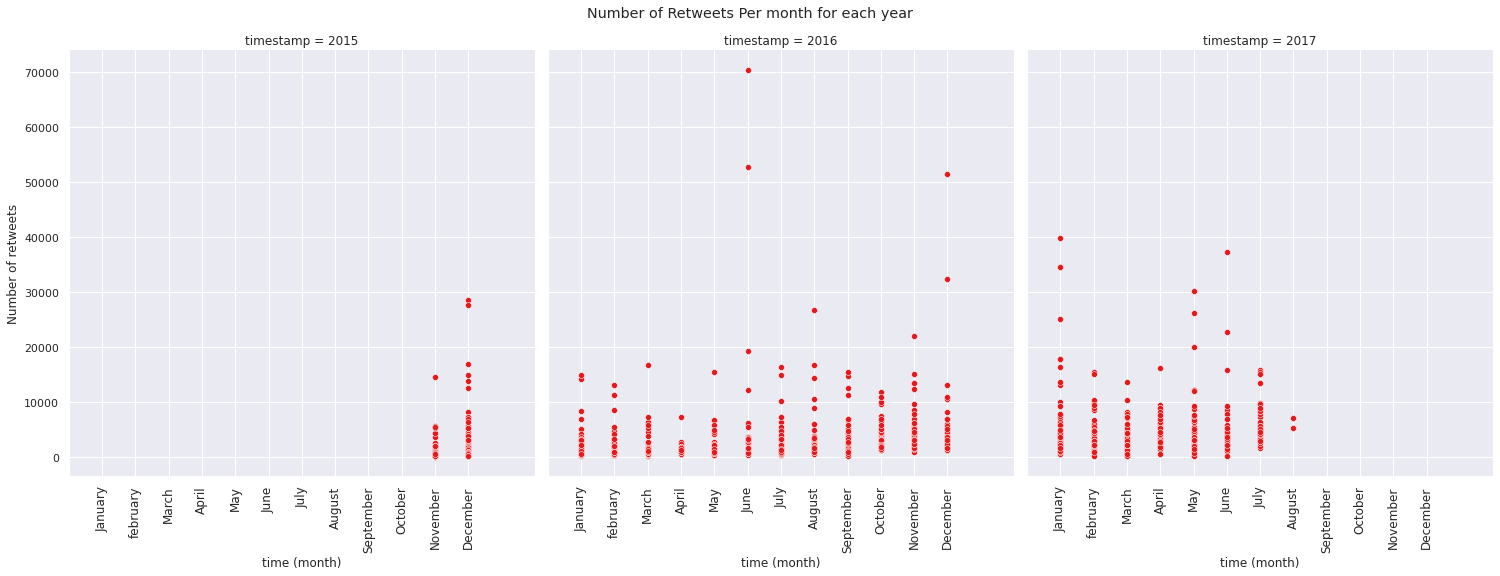

<Figure size 1440x2880 with 0 Axes>

In [ ]:
# set the color palette
sns.set_palette('Set1')

# plot a relational plot
g = sns.relplot(x= monthly_retweets, y = twitter_archive_master['retweets'],  col = twitter_archive_master['timestamp'].dt.year, ci = None, markers = True, height = 7)

# set axis labels
g.set(xlabel = 'time (month)', ylabel = 'Number of retweets')
g.set_xticklabels(size = 12)

# set title
g.fig.suptitle('Number of Retweets Per month for each year', y = 1.03)

#set tick labels
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['January', 'february', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
g.set_xticklabels(rotation = 90)

# set figure size
plt.figure(figsize=(20,40))
plt.show()

> Highest retweet  occurred in june 2016

## Lineplot

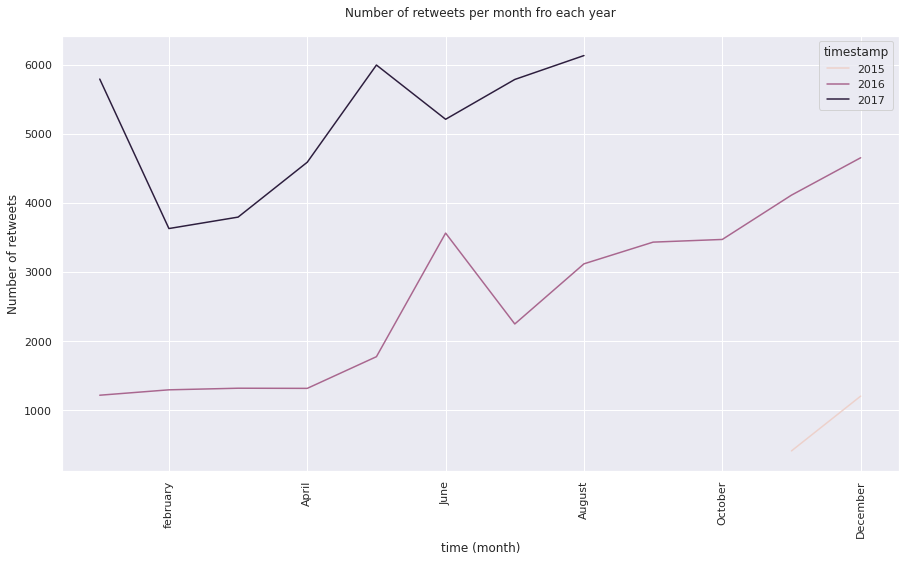

In [ ]:
# draw a lineplot
p = sns.lineplot(x= monthly_retweets, y = twitter_archive_master['retweets'],  hue = twitter_archive_master['timestamp'].dt.year, ci = None, markers = True, )

# set axis label
p.set(xlabel ='time (month)' , ylabel = 'Number of retweets')

# set tick labels
made = ['January', 'february', 'April',  'June',  'August', 'October', 'December']

p.set_xticklabels(made, rotation = 90)

#set title
p.set_title('Number of retweets per month fro each year', y = 1.03)
plt.show()

> This graph shows that there was a sharp drop in the number of retweet between january 2017 and february 2017 before it begins to increase from february 2017.
We also see a sharp drop in retweets between june 2016 and july 2016.
But generally, there are more retweets in 2017 than in 2017

# Is the number of retweets related to the number of likes(favorites)?

## Scatter plot

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


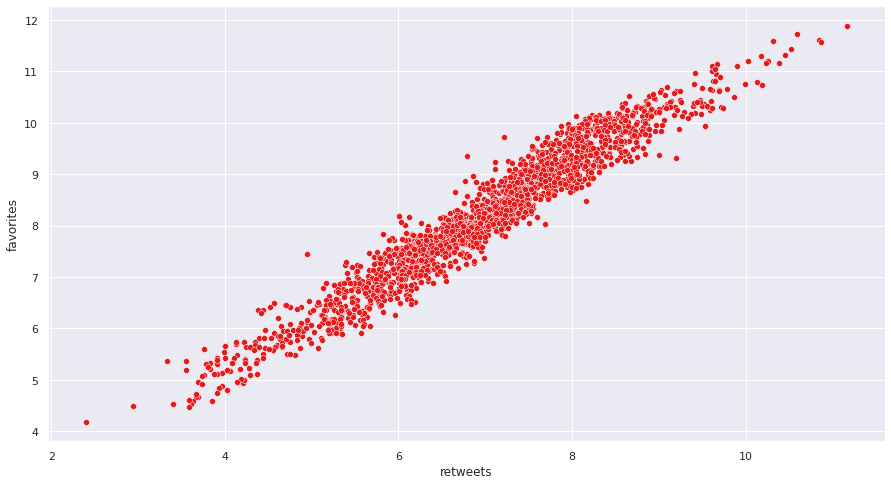

In [ ]:
# convert each column to log since the values clustered to one end
master = np.log(twitter_archive_master['retweets'])
slave = np.log(twitter_archive_master['favorites'])

# draw scatterplot
sns.scatterplot(x = master, y = slave, data = twitter_archive_master, palette= 'RdBu_r')

> This shows a very strong correlation between retweets and number of likes as both are seen to be dirctly proportional. This doesn't mean high like result in high retweets. This just depict a raltioship.

# Does a Higher dog rating relates to more likes?

## Scatter plot

Text(0.5, 1.0, 'Number of likes for each dog rating')

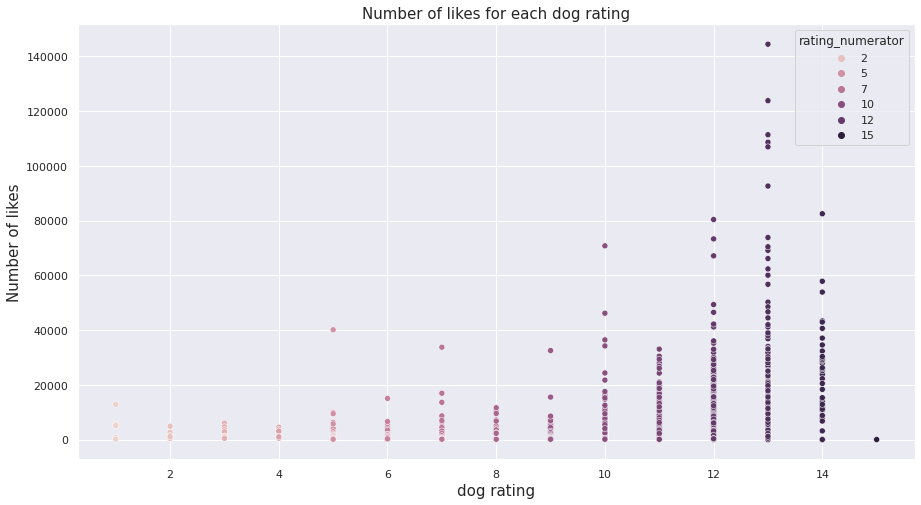

In [ ]:
sns.set_palette('Set1')
# draw a scatter plot
sns.scatterplot(x = 'rating_numerator', y = 'favorites', data = twitter_archive_master, hue = 'rating_numerator')

#set axis labels
plt.xlabel('dog rating', fontsize = 15)
plt.ylabel('Number of likes', fontsize = 15)
plt.title('Number of likes for each dog rating', fontsize = 15)

> We can see that dog with higher rating recieved more likes than those with lower rating. This doesn't necessarily mean higher dog rating would result in higher likes

# Does a higher dog rating relates to more retweets

## Scatter plot

(0.29999999999999993, 15.7)

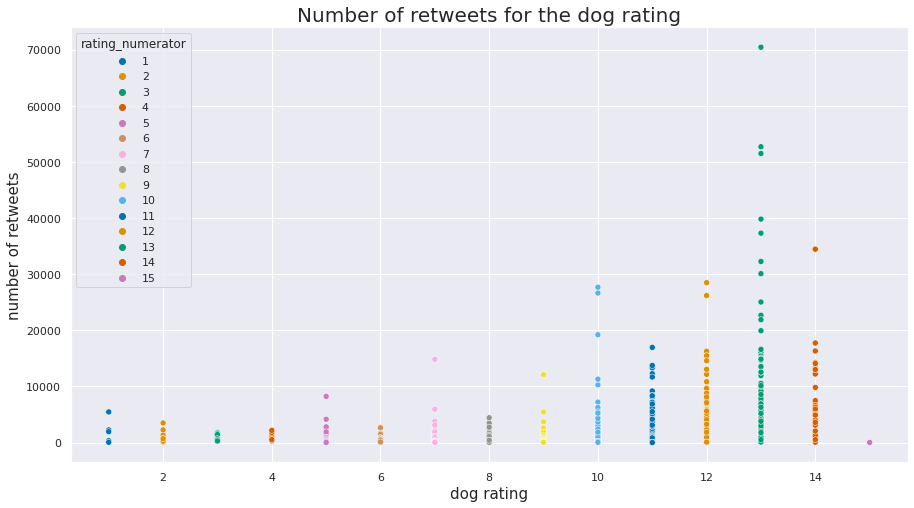

In [ ]:
sns.set_palette('Set1')

# draw a scatter plot
sns.scatterplot(x = 'rating_numerator', y = 'retweets', data = twitter_archive_master, hue = 'rating_numerator', palette='colorblind')

# set axis and title labels
plt.title('Number of retweets for the dog rating', fontsize = 20)
plt.xlabel('dog rating', fontsize = 15)
plt.ylabel('number of retweets', fontsize = 15)
plt.xlim()

> The same trend that we saw with the number of likes and dog rating is also seen here with higher rating getting more retweets